In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})
sns.set(font_scale=1.5)
sns.set_style({'axes.grid' : False})

In [32]:
prods = pd.read_excel('./prods/prod.xls', sheet_name='Tab-24', header=None)
prods_def = prods[4:56][[0,1,2,4,5,6,8,9,10]]

prods_def_sudeste1 = prods_def[[0,1,2]]
prods_def_sudeste1.columns = ['codigo','sub-bacia','prod']
prods_def_sudeste1.reset_index(inplace=True)
prods_def_sudeste1 = prods_def_sudeste1[['codigo','sub-bacia','prod']]
prods_def_sudeste1.set_index('codigo', inplace=True)

prods_def_sudeste2 = prods_def[[4,5,6]]
prods_def_sudeste2.columns = ['codigo','sub-bacia','prod']
prods_def_sudeste2.reset_index(inplace=True)
prods_def_sudeste2 = prods_def_sudeste2[['codigo','sub-bacia','prod']]
prods_def_sudeste2.set_index('codigo', inplace=True)

prods_def_sul_nordeste_norte = prods_def[[8,9,10]]
prods_def_sul_nordeste_norte.columns = ['codigo','sub-bacia','prod']
prods_def_sul_nordeste_norte.reset_index(inplace=True)
prods_def_sul_nordeste_norte = prods_def_sul_nordeste_norte[['codigo','sub-bacia','prod']]
prods_def_sul_nordeste_norte.set_index('codigo', inplace=True)

In [3]:
grande = [1, 211, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18]
paranaiba = [22, 251, 24, 25, 206, 207, 28, 205, 23, 209, 31, 32, 33, 99, 247, 248, 261, 294, 241]
paranapanema = [47, 48, 49, 249, 50, 51, 52, 57, 61, 62, 63]
parana = [34, 245, 154, 246, 266]
iguacu = [74, 76, 71, 72, 73, 77, 78, 222, 81]
uruguai = [215, 88, 89, 216, 217, 92, 93, 220, 94, 286, 102, 103]
saofrancisco = [155, 156, 158, 169, 172, 178]
tocantins = [270, 191, 253, 257, 273, 271, 275]    

In [4]:
# Function to put values on top/middle of the bar graphs
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2 
                if p.get_y() < 1:
                    space = 0
                _y = p.get_y() + (p.get_height() + (p.get_height()*0.01)) + float(space)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center", size='large', color='black') 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [5]:
def calcula_ena_media(nome):

    valor = calcula_ena(nome[0])
    
    for bacia in nome[1:]:
        valor2 = calcula_ena(bacia)
        valor = pd.concat([valor, valor2], axis = 1)
    
    valor['Soma [MWmed]'] = valor.sum(axis=1)
    return valor

In [6]:
def calcula_ena(posto):
    
    if posto in grande:
        
        nome_da_bacia = 'Grande'
        
    if posto in paranaiba:
        
        nome_da_bacia = 'Paranaíba'
        
    if posto in paranapanema:
        
        nome_da_bacia = 'Paranapanema'

    if posto in parana:
        
        nome_da_bacia = 'Paraná'
        
    if posto in iguacu:
        
        nome_da_bacia = 'Iguaçu'
        
    if posto in saofrancisco:
        
        nome_da_bacia = 'São Francisco'
    
    if posto in tocantins:
        
        nome_da_bacia = 'Tocantins'
        
    if posto in uruguai:
        
        nome_da_bacia = 'Uruguai'
        
    vazao = pd.read_excel('./acomph/ACOMPH_15.12.2022.xls', sheet_name=nome_da_bacia)
    v = vazao[posto][4:34]
    datas = vazao['Unnamed: 0'][4:34]
    
    if posto in prods_def_sudeste1.index: 
    
        ena = prods_def_sudeste1.at[posto,'prod'] * v
        nome_posto = prods_def_sudeste1.at[posto,'sub-bacia']

    if posto in prods_def_sudeste2.index: 
    
        ena = prods_def_sudeste2.at[posto,'prod'] * v
        nome_posto = prods_def_sudeste2.at[posto,'sub-bacia']
        
    if posto in prods_def_sul_nordeste_norte.index: 
    
        ena = prods_def_sul_nordeste_norte.at[posto,'prod'] * v
        nome_posto = prods_def_sul_nordeste_norte.at[posto,'sub-bacia']
        
    ena = pd.DataFrame(ena.values)
    formato = "%d%m%Y"
    ena.index = datas
    datas_nova = ena.index.strftime(formato)
    ena.index = datas_nova
    ena.reset_index(inplace=True)
    ena.columns = ['Data', nome_posto + ' [MWmed]']
    ena.set_index('Data', inplace=True)
    
    return ena

In [8]:
bacia_ena = calcula_ena_media(paranaiba)

In [9]:
import pandas as pd
import numpy as np

values_grande = []
values_iguacu = []
values_parana = []
values_paranapanema = []
values_paranaiba = []
values_tocantins = []
values_saofrancisco = []
values_uruguai = []

# lendo os arquivos

for dias in bacia_ena.index:

    filename = './psat/psat_' + dias + '.txt'

    df = pd.read_table(filename, delim_whitespace=True, header=None)

    # colocando em um df

    df.columns=['NAME','LAT','LON','PREC']

    # separando em bacias

    sub_bacias_grande = ['PSATAGV' , 'PSATCMG', 'PSATCES', 'PSATELC', 'PSATFUN', 'PSATFUR', 'PSATMRB', 'PSATPRG', 'PSATPAS','PSATPTB', 'PSATPTC']

    sub_bacias_iguacu = ['PSATFZA', 'PSATJSG', 'PSATSCX', 'PSATSCL', 'PSATUVT']

    sub_bacias_parana = ['PSATBSM', 'PSATFLE', 'PSATITP', 'PSATIVM', 'PSATPTQ','PSATISOT', 'PSATJUP', 'PSATSDG', 'PSATFZBT', 'PSATPPRA'] 

    sub_bacias_paranaiba = ['PSATESP', 'PSATSRC', 'PSATFRCL','PSATCBI', 'PSATCBIV', 'PSATEMB', 'PSATIMBR', 'PSATNPTE', 'PSATARV', 'PSATSFC', 'PSATSSM']

    sub_bacias_paranapanema = ['PSATCNI', 'PSATCPV', 'PSATCHT', 'PSATJUR', 'PSATMAU', 'PSATROS']

    sub_bacias_saofrancisco = ['PSATQMD', 'PSATRBX', 'PSATSFR', 'PSATSRM', 'PSATTMR', 'PSATBOQ']

    sub_bacias_tocantins = ['PSATSME', 'PSATBTE', 'PSATARAG', 'PSATLAJ', 'PSATPTRL', 'PSATLJET', 'PSATUCR']

    sub_bacias_uruguai = ['PSATBGR', 'PSATCNV', 'PSATFCH', 'PSATITA', 'PSATMCD', 'PSATMOJ', 'PSATQQX', 'PSATPSJ']

    df.set_index('NAME', inplace=True)

    grande_vals = np.round(df.loc[sub_bacias_grande]['PREC'].mean(), 0)
    iguacu_vals = np.round(df.loc[sub_bacias_iguacu]['PREC'].mean(), 0)
    parana_vals = np.round(df.loc[sub_bacias_parana]['PREC'].mean(), 0)
    paranaiba_vals = np.round(df.loc[sub_bacias_paranaiba]['PREC'].mean(), 0)
    paranapanema_vals = np.round(df.loc[sub_bacias_paranapanema]['PREC'].mean(), 0)
    saofrancisco_vals = np.round(df.loc[sub_bacias_saofrancisco]['PREC'].mean(), 0)
    tocantins_vals = np.round(df.loc[sub_bacias_tocantins]['PREC'].mean(), 0)
    uruguai_vals = np.round(df.loc[sub_bacias_uruguai]['PREC'].mean(), 0)

    values_grande.append(grande_vals)
    values_iguacu.append(iguacu_vals)
    values_parana.append(parana_vals)
    values_paranapanema.append(paranapanema_vals)
    values_paranaiba.append(paranaiba_vals)
    values_tocantins.append(tocantins_vals)
    values_saofrancisco.append(saofrancisco_vals)
    values_uruguai.append(uruguai_vals)

chuva_grande = np.sum(values_grande)
chuva_iguacu = np.sum(values_iguacu)
chuva_parana = np.sum(values_parana)
chuva_paranapanema = np.sum(values_paranapanema)
chuva_paranaiba = np.sum(values_paranaiba)
chuva_tocantins = np.sum(values_tocantins)
chuva_saofrancisco = np.sum(values_saofrancisco)
chuva_uruguai = np.sum(values_uruguai)

In [10]:
bacia_ena['PSAT'] = values_paranaiba

In [11]:
bacia_ena.reset_index(inplace=True)

In [12]:
bacia_ena2 = bacia_ena[['Data','PSAT','Soma [MWmed]']]

In [65]:
datas = bacia_ena2.Data.values

In [69]:
formato = "%d/%m"
datas_fmt = pd.to_datetime(datas, format='%d%m%Y').strftime(formato)
bacia_ena2['Data'] = datas_fmt

<ipython-input-69-8cf9a783b690>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bacia_ena2['Data'] = datas_fmt


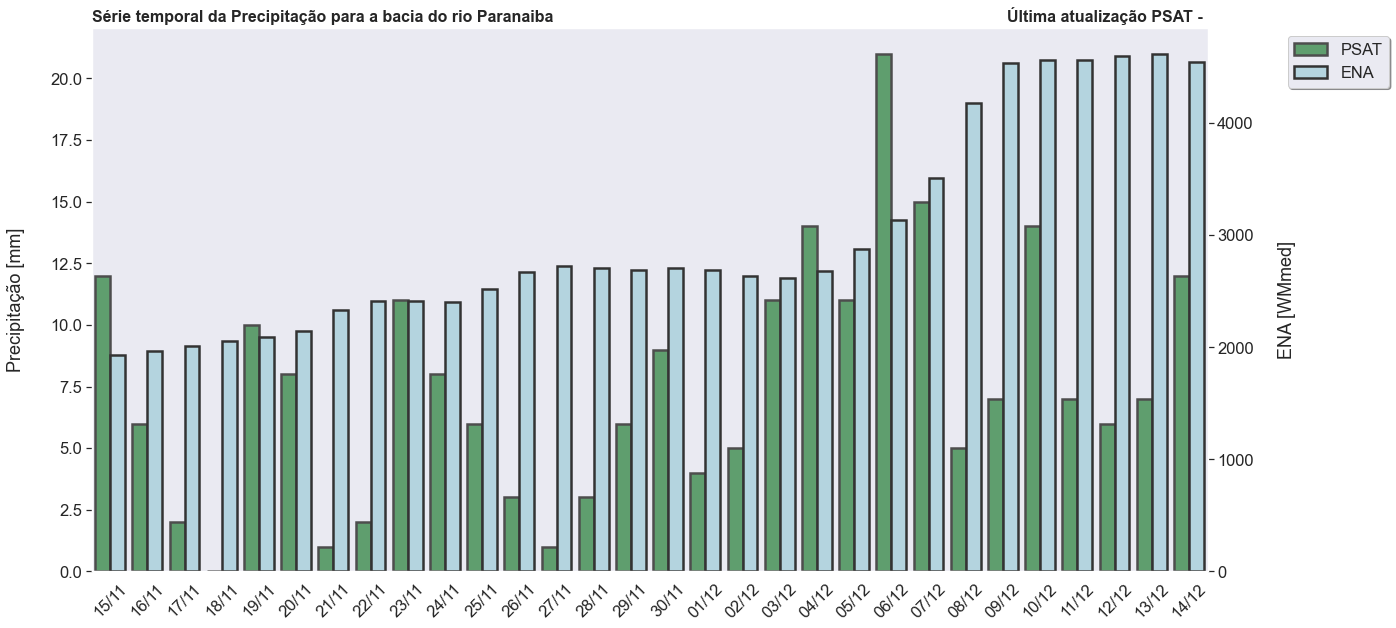

In [111]:
fig = plt.figure()
ax = sns.barplot(x='Data', y='PSAT', data=bacia_ena2, color='g', linewidth=2.5, edgecolor=".3", label = 'PSAT')
width_scale = 0.5
for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width_scale)
ax2 = ax.twinx()
sns.barplot(x='Data', y='Soma [MWmed]', data=bacia_ena2, ax=ax2, color='lightblue', linewidth=2.5, edgecolor=".2", label='ENA')
for bar in ax2.containers[0]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + w * (1- width_scale))
    bar.set_width(w * width_scale)
for item in ax.get_xticklabels():
    item.set_rotation(45)
    
ax.set(xlabel=None)
ax2.set(xlabel=None)
ax.set_ylabel('Precipitação [mm]\n')
ax2.set_ylabel('\nENA [WMmed]')

plt.title(f'Série temporal da Precipitação para a bacia do rio Paranaiba', loc='left', fontsize = 16, fontweight="bold")
plt.title(f'Última atualização PSAT - ', loc='right', fontsize = 16, fontweight="bold")
fig.legend(bbox_to_anchor=(1.17,1), bbox_transform=ax.transAxes, fancybox=True, shadow=True)

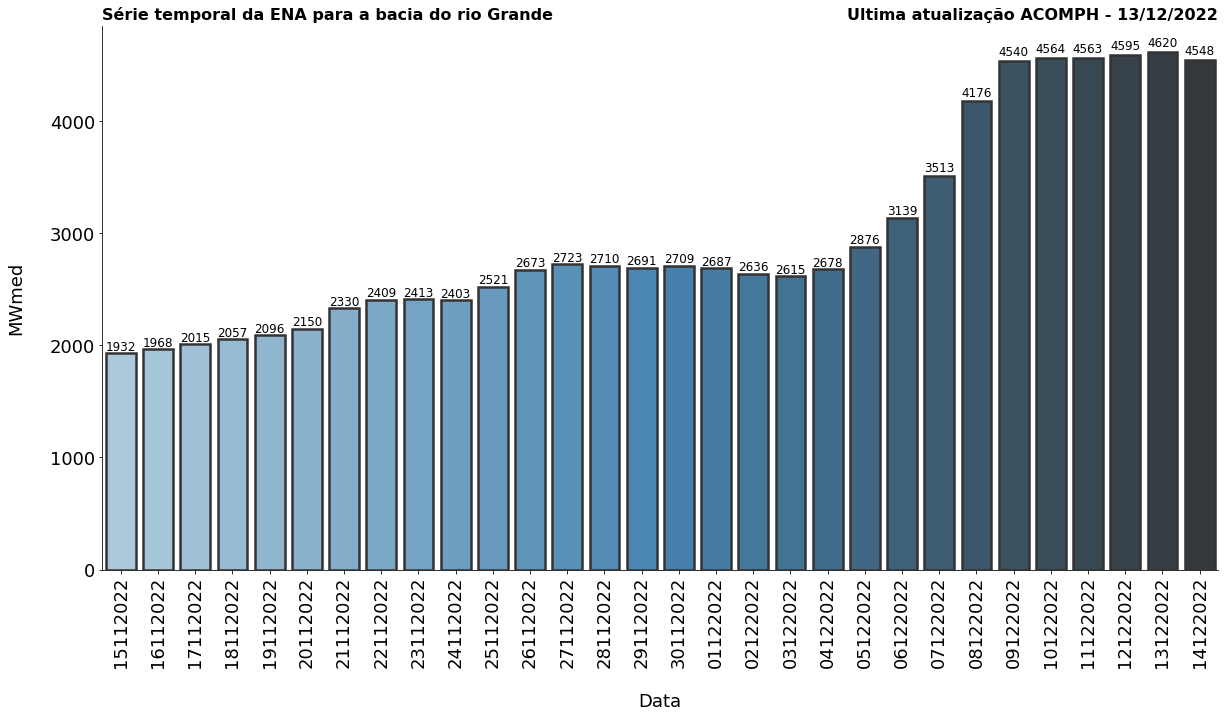

In [27]:
ax = sns.barplot(x=bacia_ena.index, y='Soma [MWmed]', data = bacia_ena, palette='Blues_d', linewidth=2.5, edgecolor=".2")
show_values(ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xticks(rotation=90)
plt.title('Série temporal da ENA para a bacia do rio Grande', loc='left', fontsize = 16, fontweight="bold")
plt.title('Ultima atualização ACOMPH - 13/12/2022', loc='right', fontsize = 16, fontweight="bold")
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('\nData', fontsize = 18)
plt.ylabel('MWmed\n', fontsize = 18)
plt.savefig('ena.png')

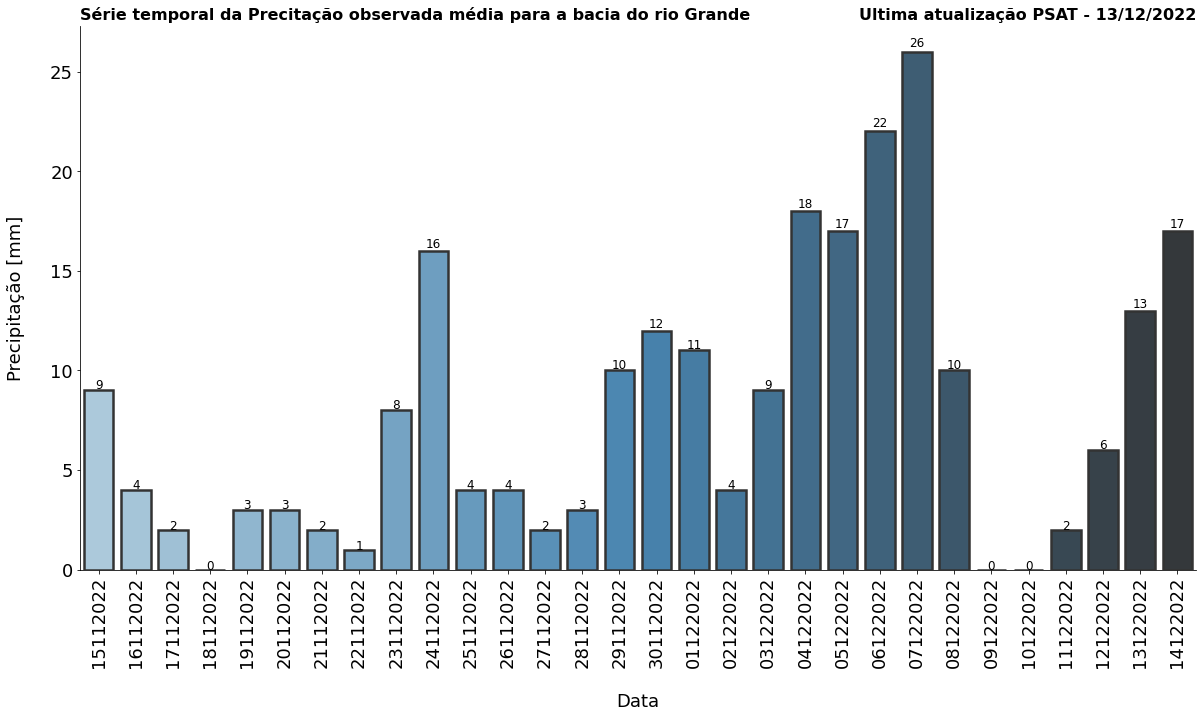

In [19]:
ax = sns.barplot(x=bacia_ena.index, y='PSAT', data = bacia_ena, palette='Blues_d', linewidth=2.5, edgecolor=".2")
show_values(ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xticks(rotation=90)
plt.title('Série temporal da Precitação observada média para a bacia do rio Grande', loc='left', fontsize = 16, fontweight="bold")
plt.title('Ultima atualização PSAT - 13/12/2022', loc='right', fontsize = 16, fontweight="bold")
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('\nData', fontsize = 18)
plt.ylabel('Precipitação [mm]\n', fontsize = 18)
plt.savefig('prec.png')

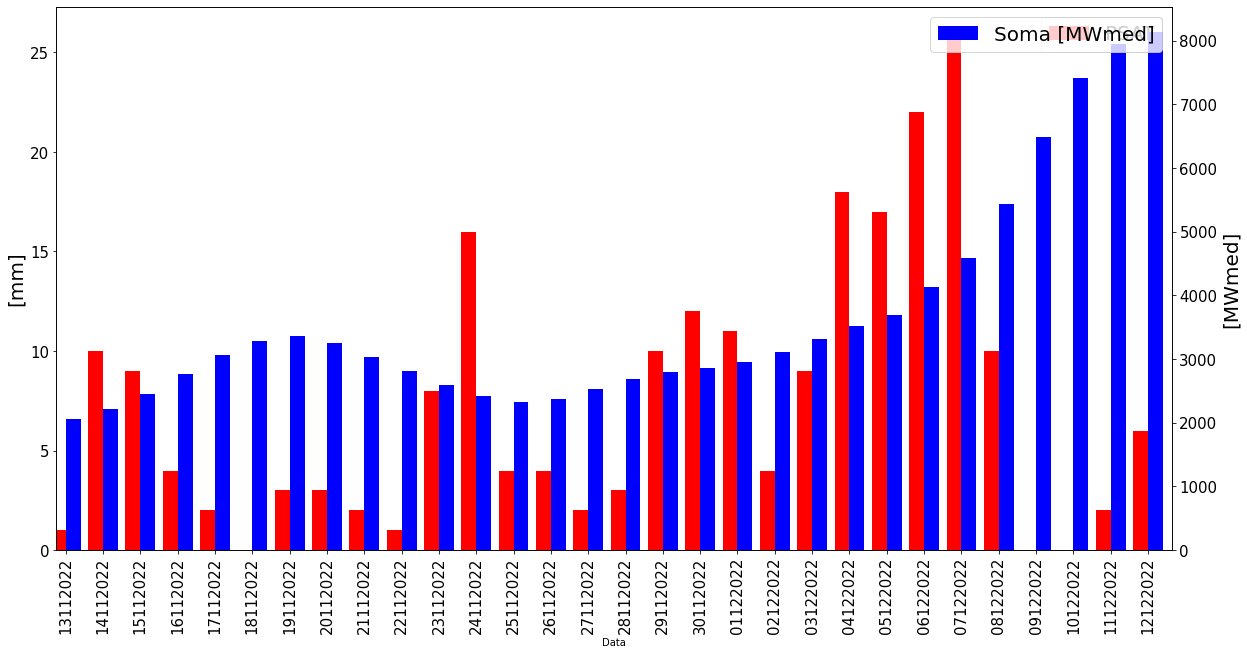

In [96]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

bacia_ena['PSAT'].plot(kind='bar', color='red', ax=ax, width=width, position=1, fontsize=15)
bacia_ena['Soma [MWmed]'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0, fontsize=15)

ax.set_ylabel('[mm]', fontsize = 20)
ax2.set_ylabel('[MWmed]', fontsize = 20 )
ax.legend(loc=1,fontsize=20)
ax2.legend(loc=1,fontsize=20)
#plt.legend()

In [ ]:
df

Text(1.0, 1.0, 'Ultima atualização ACOMPH - 13/12/2022')

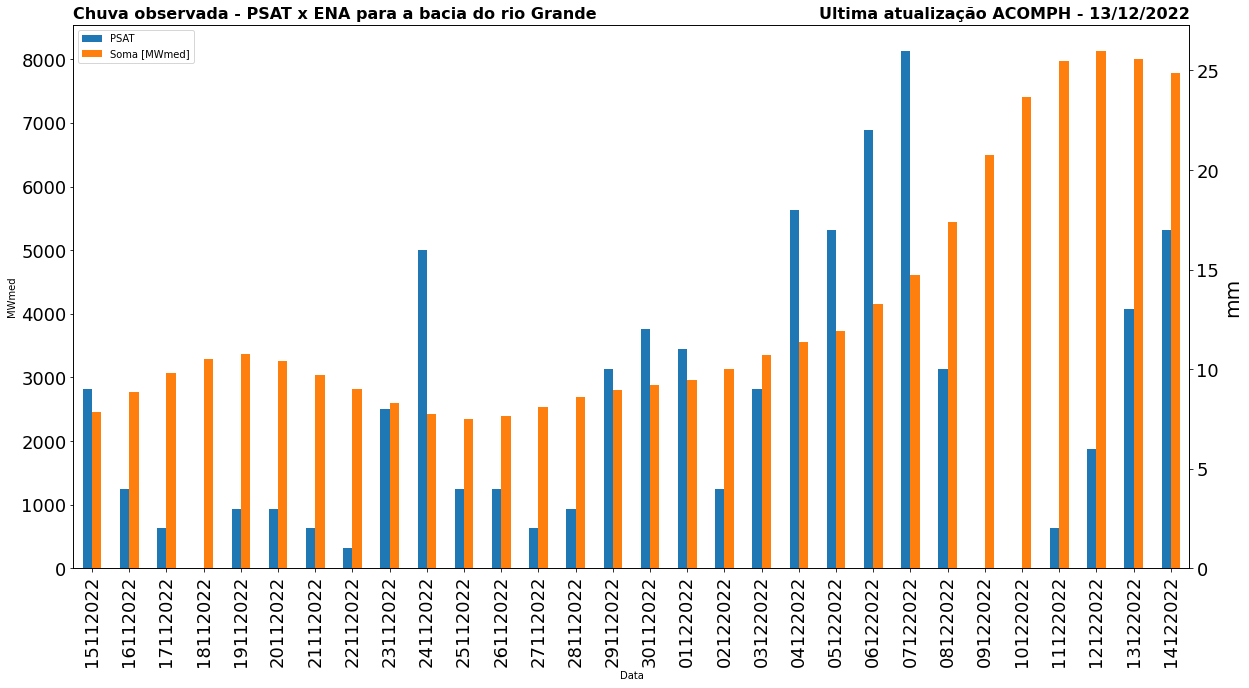

In [21]:
bacia_ena[['PSAT','Soma [MWmed]']].plot(kind='bar', secondary_y=['PSAT'], mark_right=False, ylabel = 'MWmed', fontsize=18)
plt.ylabel('mm', fontsize = 20)
plt.title('Chuva observada - PSAT x ENA para a bacia do rio Grande', loc='left', fontsize = 16, fontweight="bold")
plt.title('Ultima atualização ACOMPH - 13/12/2022', loc='right', fontsize = 16, fontweight="bold")

In [28]:
file_acomph = "./acomph/ACOMPH_15.12.2022.xls"

In [36]:
file_acomph[16:26]

'15.12.2022'

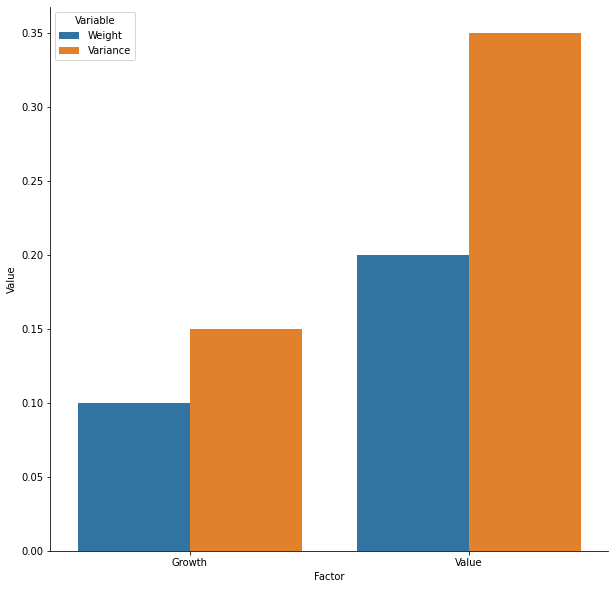

In [43]:
df = pd.DataFrame({
    'Factor': ['Growth', 'Value'],
    'Weight': [0.10, 0.20],
    'Variance': [0.15, 0.35]
})
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = df.melt(id_vars='Factor').rename(columns=str.title)
sns.barplot(x='Factor', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)

In [44]:
tidy

,Factor,Variable,Value
0,Growth,Weight,0.10
1,Value,Weight,0.20
2,Growth,Variance,0.15
3,Value,Variance,0.35


In [45]:
df

,Factor,Weight,Variance
0,Growth,0.1,0.15
1,Value,0.2,0.35
